In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

stock_returns = pd.read_csv('small_portfolio.csv', parse_dates = ['date'], index_col = 'date')
stock_returns['GE'] = stock_returns['GE'] / stock_returns['GE'][0]
stock_returns['JPM'] = stock_returns['JPM'] / stock_returns['JPM'][0]
stock_returns['MSFT'] = stock_returns['MSFT'] / stock_returns['MSFT'][0]
stock_returns['PG'] = stock_returns['PG'] / stock_returns['PG'][0]

stock_returns['portfolio'] = stock_returns[['GE','JPM', 'MSFT',  'PG']].mean(axis = 1)
# Check beginning and end of dataset
print(stock_returns.head())
print(stock_returns.tail())

                  GE       JPM      MSFT        PG  portfolio
date                                                         
2015-01-02  1.000000  1.000000  1.000000  1.000000   1.000000
2015-01-05  0.981644  0.968955  0.990697  0.995245   0.984135
2015-01-06  0.960495  0.943831  0.976262  0.990712   0.967825
2015-01-07  0.960894  0.945271  0.988666  0.995909   0.972685
2015-01-08  0.972466  0.966395  1.017750  1.007298   0.990977
                  GE       JPM      MSFT        PG  portfolio
date                                                         
2018-03-21  0.553871  1.836134  1.977759  0.851835   1.304900
2018-03-22  0.532721  1.759482  1.920231  0.844870   1.264326
2018-03-23  0.521548  1.712434  1.864414  0.839341   1.234434
2018-03-26  0.514366  1.765242  2.005560  0.844870   1.282509
2018-03-27  0.536313  1.730997  1.913388  0.860128   1.260206


In [2]:
def cum_ret(a):
    a = np.concatenate((np.zeros(1), a.pct_change()[1:]))
    a = np.cumprod(a + 1)
    return a

In [3]:
def plot_pct_returns(df):
    fig, ax = plt.subplots()
    ax.plot(df.index, df.MSFT, marker='', color='green', linewidth=2, label="MSFT")
    ax.plot(df.index, df.portfolio, linewidth=2, linestyle='dashed', color='skyblue', label='portfolio')
    ax.plot(df.index, df.PG, marker='', color='pink', linewidth=2, label="PG")
    ax.plot(df.index, df.JPM, color='yellow', linewidth=2, label='JPM')
    ax.plot(df.index, df.GE, color='red', linewidth=2, label='GE')
    ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
    plt.legend()
    plt.show()

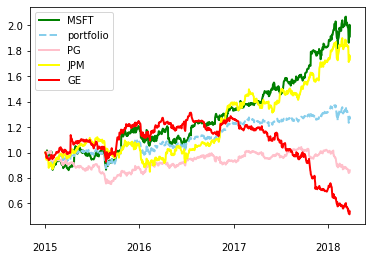

In [4]:
# Plot percentage returns
plot_pct_returns(stock_returns)

In [5]:
data = pd.read_csv('small_portfolio.csv', parse_dates = ['date'], index_col = 'date')
data.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10


In [6]:
# Calculate percentage returns
returns = data.pct_change()

# Calculate individual mean returns 
meanDailyReturns = returns.mean()

# Define weights for the portfolio
weights = np.array([0.5, 0.2, 0.2, 0.1])

# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

# Print the portfolio return
print(portReturn)

-1.6782226618545547e-05


In [7]:
# Create portfolio returns column
returns['Portfolio']= returns.dot(weights)

In [8]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print (daily_cum_ret.tail())

                  GE       JPM      MSFT        PG  Portfolio
date                                                         
2018-03-21  0.553871  1.836134  1.977759  0.851835   0.974287
2018-03-22  0.532721  1.759482  1.920231  0.844870   0.941086
2018-03-23  0.521548  1.712434  1.864414  0.839341   0.920097
2018-03-26  0.514366  1.765242  2.005560  0.844870   0.933974
2018-03-27  0.536313  1.730997  1.913388  0.860128   0.943378


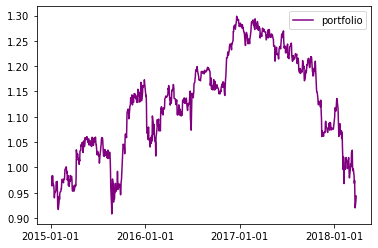

In [9]:
# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

### Portfolio variance
Your turn! It's time to calculate the risk of our 4-stock portfolio. 
Let's start with the pricing data, available under data. 
You'll have to calculate daily percentage returns and assign weights to your portfolio. 
You'll then continue by calculating the covariance matrix, and use the following formula: 
```Portfolio variance = Weights transposed x (Covariance matrix x Weights)```
to get the final portfolio variance.

In [10]:
# Get percentage daily returns
daily_returns = data.pct_change()

# Assign portfolio weights
weights = np.array([0.05, 0.4, 0.3, 0.25])

In [11]:
# Calculate the covariance matrix on daily returns
#The multiplication with 250 is to account for 250 trading days in a year.
cov_matrix = (daily_returns.cov())*250
print (cov_matrix)

            GE       JPM      MSFT        PG
GE    0.045987  0.022828  0.016285  0.010101
JPM   0.022828  0.046660  0.024135  0.010812
MSFT  0.016285  0.024135  0.054054  0.014144
PG    0.010101  0.010812  0.014144  0.020645


In [12]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

2.55%


In [13]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

15.959999999999999%


In [14]:
##################################################################################

Annualizing portfolio returns
Suppose you invested $101 at the beginning of 2015 in a portfolio. 
By the end of March 2018, you wonder how your portfolio has performed over time, 
and whether it is as good as another portfolio which started trading mid-2016. 
What performance metric do you look at? Well, the annualized return of course!

So let's calculate the annualized rate of return for your portfolio. 
Since our sample covers 3.2 years, let's use the monthly denomination in the formula 
for annualized returns. The number of months is already given under

In [15]:
stock_returns['portfolio'] = np.dot(stock_returns[['GE','JPM', 'MSFT',  'PG']], weights)
stock_returns['pf_returns'] = stock_returns['portfolio'].pct_change()
stock_returns['pf_returns'][0] = 0
stock_returns['pf_AUM'] = stock_returns['portfolio'] * 101
stock_returns

,GE,JPM,MSFT,PG,portfolio,pf_returns,pf_AUM
date,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,101.000000
2015-01-05,0.981644,0.968955,0.990697,0.995245,0.982685,-0.017315,99.251158
2015-01-06,0.960495,0.943831,0.976262,0.990712,0.966114,-0.016863,97.577483
2015-01-07,0.960894,0.945271,0.988666,0.995909,0.971730,0.005813,98.144737
2015-01-08,0.972466,0.966395,1.017750,1.007298,0.992331,0.021200,100.225394
...,...,...,...,...,...,...,...
2018-03-21,0.553871,1.836134,1.977759,0.851835,1.568434,-0.004166,158.411788
2018-03-22,0.532721,1.759482,1.920231,0.844870,1.517715,-0.032337,153.289251
2018-03-23,0.521548,1.712434,1.864414,0.839341,1.480210,-0.024711,149.501257


In [16]:
pf_returns = stock_returns.pf_returns
pf_AUM = stock_returns.pf_AUM

In [17]:
# Calculate total rate of return from portfolio AUM
total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]

In [18]:
months = 38
# Annualize return
annualized_return = ((1 + total_return)**(12/months))-1
print (annualized_return)

0.13857372965601122


In [19]:
sp500_value = pd.read_csv('sp500.csv', parse_dates = ['date'], index_col = 'date')
sp500_value = sp500_value[sp500_value.index <= '2018-12-31']['S&P500']
sp500_value

date
2015-01-02    2058.199951
2015-01-05    2020.579956
2015-01-06    2002.609985
2015-01-07    2025.900024
2015-01-08    2062.139893
                 ...     
2018-12-24    2351.100098
2018-12-26    2467.699951
2018-12-27    2488.830078
2018-12-28    2485.739990
2018-12-31    2506.850098
Name: S&P500, Length: 1006, dtype: float64

In [20]:
# Calculate the total return from the S&P500 value series
total_return = (sp500_value[-1] - sp500_value[0]) / sp500_value[0]
print(total_return)

# Annualize the total return spanning 4 years
annualized_return = ((1 + total_return)**(1/4))-1
print (annualized_return)

0.21798180822131397
0.050534212239337295


In [21]:
# Calculate total return and annualized return from price data 
total_return = (sp500_value[-1] - sp500_value[0]) / sp500_value[0]

# Annualize the total return over 4 year 
annualized_return = ((1 + total_return)**(1/4))-1

# non risk return ratio
rfr = 0

# Create the returns data 
returns_sp500 = sp500_value.pct_change()

# Calculate annualized volatility from the standard deviation Use 250 trading days
vol_sp500 = returns_sp500.std() * np.sqrt(250)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) / vol_sp500)
print (sharpe_ratio)

0.3712937456643837


In [22]:
months = 48

# Calculate total return and annualized return from price data 
total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]

# Annualize the total return over 4 year 
annualized_return = ((1 + total_return)**(12/months))-1

# Create the returns data 
pf_returns = pf_AUM.pct_change()

# Calculate annualized volatility from the standard deviation Use 250 trading days
vol_pf = pf_returns.std()*np.sqrt(250)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) /vol_pf)
print (sharpe_ratio)

0.6602038884895421


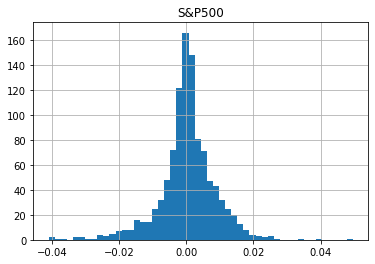

In [23]:
sp500_value = pd.read_csv('sp500.csv', parse_dates = ['date'], index_col = 'date')
returns_sp500 = sp500_value.pct_change()
# Create a histogram of the S&P500 returns and show the plot
returns_sp500.hist(bins = 50)
plt.show()

In [24]:
# Print the mean
print("mean : ", returns_sp500.mean()*100)

# Print the standard deviation
print("Std. dev  : ", returns_sp500.std()*100)

# Print the skewness
print("skew : ", returns_sp500.skew())

# Print the kurtosis ("Эксцесс")
print("kurt : ", returns_sp500.kurtosis())

mean :  S&P500    0.0339
dtype: float64
Std. dev  :  S&P500    0.861002
dtype: float64
skew :  S&P500   -0.383199
dtype: float64
kurt :  S&P500    3.922391
dtype: float64


skew :  GE      0.177313
JPM     0.018815
MSFT    0.515431
PG     -0.259934
dtype: float64
kurt :  GE      7.766370
JPM     3.831448
MSFT    9.882177
PG      2.848092
dtype: float64


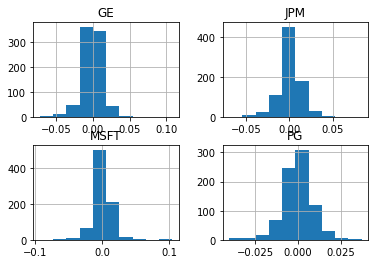

In [25]:
# Print the histograms of the stocks in the portfolio
stock_returns[['GE','JPM', 'MSFT',  'PG']].pct_change().hist()

# Print skewness and kurtosis of the stocks
print ("skew : ", stock_returns[['GE','JPM', 'MSFT',  'PG']].pct_change().skew())
print ("kurt : ", stock_returns[['GE','JPM', 'MSFT',  'PG']].pct_change().kurtosis())

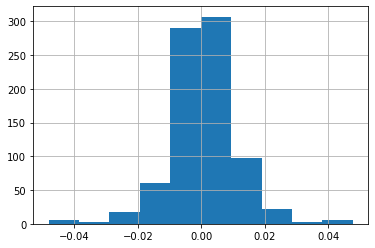

skew :  -0.19104518279548718
kurt :  3.8232652367118276


In [26]:
# Print the histogram of the portfolio
pf_returns.hist()
plt.show()

# Print skewness and kurtosis of the portfolio
print ("skew : ", pf_returns.skew())
print ("kurt : ", pf_returns.kurtosis())

In [27]:
rfr = 0
target = 0

df = pd.DataFrame(stock_returns.portfolio.pct_change()).rename(columns={"portfolio": "pf_returns"})


# Create a downside return column with the negative returns only
downside_returns = df.loc[df['pf_returns'] < target]

# Calculate expected return and std dev of downside
expected_return = df['pf_returns'].mean()
down_stdev = downside_returns['pf_returns'].std()

# Calculate the sortino ratio
sortino_ratio = (expected_return - rfr)/down_stdev

# Print the results
print("Expected return  : ", expected_return*100)
print("Downside risk   : ", down_stdev*100)
print("Sortino ratio : ", sortino_ratio)

Expected return  :  0.055994903728926966
Downside risk   :  0.7764996443780087
Sortino ratio :  0.07211195025566298


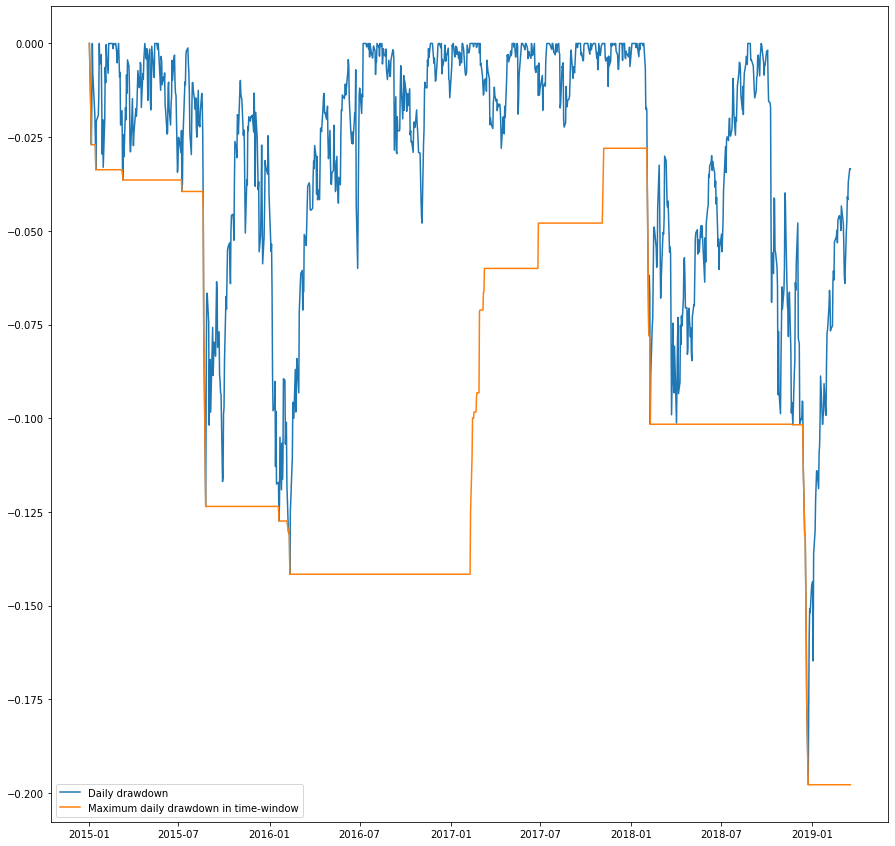

In [28]:
df = sp500_value

# Calculate the max value 
roll_max = df.rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = df/roll_max - 1

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(df.index, daily_draw_down, label='Daily drawdown')
plt.plot(df.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

In [29]:
###################################################################################################3

In [30]:
portfolio_data = pd.read_csv("large_pf.csv", index_col = 0)
portfolio_data

,mean_return,variance,pf_weights,bm_weights,Security,GICS Sector,GICS Sub Industry
A,0.146146,0.035194,0.000,0.000,Agilent Technologies Inc,Health Care,Health Care Equipment
AAL,0.444411,0.094328,0.214,0.000,American Airlines Group,Industrials,Airlines
AAP,0.242189,0.029633,0.000,0.000,Advance Auto Parts,Consumer Discretionary,Automotive Retail
AAPL,0.225074,0.027283,0.000,0.000,Apple Inc.,Information Technology,Computer Hardware
ABBV,0.182541,0.029926,0.000,0.000,AbbVie,Health Care,Pharmaceuticals
...,...,...,...,...,...,...,...
YHOO,0.162994,0.036719,0.000,0.000,Yahoo Inc.,Information Technology,Internet Software & Services
YUM,0.162098,0.023774,0.000,0.000,Yum! Brands Inc,Consumer Discretionary,Restaurants
ZBH,0.103081,0.020171,0.000,0.000,Zimmer Biomet Holdings,Health Care,Health Care Equipment
ZION,0.225957,0.046199,0.000,0.000,Zions Bancorp,Financials,Regional Banks


In [31]:
# Check the portfolio weights
print(portfolio_data.pf_weights.sum())

100.0


In [32]:
# Calculate return of the portfolio
total_return_pf = (portfolio_data['pf_weights']*portfolio_data['mean_return']).sum()
total_return_pf

33.13402587259356

In [33]:
# Calculate return of the benchmark
total_return_bm = (portfolio_data['bm_weights']*portfolio_data['mean_return']).sum()
total_return_bm

10.557642112692946

In [34]:
# Calculate and print the active return
active_return = total_return_pf - total_return_bm
print ("%.2f%%" % active_return)

22.58%


In [35]:
# Print the sum of the bm and pf weights
print (portfolio_data.pf_weights.sum())
print (portfolio_data.bm_weights.sum())

100.0
100.001


In [36]:
# Group dataframe by GICS sectors 
grouped_df=portfolio_data.groupby('GICS Sector').sum()

In [37]:
# Calculate active weights of portfolio
grouped_df['active_weight']=grouped_df['pf_weights']-grouped_df['bm_weights']
print (grouped_df['active_weight'])

GICS Sector
Consumer Discretionary         20.257
Consumer Staples               -5.176
Energy                          0.000
Financials                     -2.116
Health Care                     2.865
Industrials                     2.465
Information Technology          8.693
Materials                      -2.043
Real Estate                     2.014
Telecommunications Services    -1.367
Utilities                     -25.593
Name: active_weight, dtype: float64


In [38]:
df = pd.read_csv("sp500.csv", parse_dates = ["date"], index_col = 'date')
df = df.pct_change()*100

In [39]:
momentum = np.array([-0.11,  1.02,  0.41,  1.07,  0.31,  0.28,  0.77,  0.46,  0.06,
        0.24, -0.39,  0.64, -0.6 ,  0.7 ,  0.38, -0.48, -0.76,  1.34,
        0.8 , -1.99, -1.16, -1.52,  1.01, -0.7 , -0.61, -0.9 ,  1.54,
        0.34, -0.45, -1.17, -0.02,  0.98, -0.2 ,  0.58,  0.91, -0.3 ,
       -0.94,  0.57, -0.29,  0.57, -0.29,  0.19,  0.15, -0.18,  0.71,
        0.46, -0.23,  0.6 ,  0.56,  0.69,  0.3 , -0.81,  1.36, -0.74,
       -0.63, -0.09, -1.6 ,  0.05,  1.28,  0.39, -0.38, -0.43, -0.4 ,
       -1.  , -0.19,  1.29, -0.5 ,  0.05,  0.24, -1.08, -1.41,  0.32,
       -0.15,  0.37,  1.1 , -0.23, -0.25,  0.24, -1.43, -0.86, -1.14,
       -1.1 ,  0.96,  0.17, -0.46,  0.56,  1.  ,  0.05,  0.42, -0.25,
       -0.2 ,  0.84, -0.14,  0.81,  0.83, -0.16, -0.45,  0.41,  0.4 ,
        0.82,  0.13,  0.14,  0.37, -0.87,  0.47,  0.12,  0.08,  0.  ,
       -0.25, -0.16,  0.39,  0.04,  0.3 ,  0.25,  0.03,  0.78,  0.52,
        0.25, -0.25, -0.16,  0.71, -0.05,  0.01,  0.79,  0.95, -0.36,
        1.1 , -0.25,  0.26,  0.19,  0.96,  0.33,  0.11,  1.11,  0.69,
        0.45,  1.37, -0.24,  0.91,  0.11,  0.44,  0.29, -0.6 , -1.1 ,
        0.45,  0.73,  0.62,  0.37,  0.8 , -2.01,  0.78, -1.65, -0.07,
       -0.88,  1.34,  0.22,  0.74, -0.03,  0.91, -0.77, -0.14,  0.12,
        0.7 ,  0.96, -1.58, -1.05, -1.66,  0.75,  1.28, -0.77,  0.77,
        0.7 ,  0.27,  0.3 ,  1.24,  0.39, -0.14, -1.5 ,  1.01,  0.96,
       -0.26,  0.34,  1.66, -0.59, -0.92, -1.07, -0.62,  0.88,  0.86,
       -0.92, -1.79, -2.58, -0.44, -1.26,  0.31,  1.4 , -0.06, -0.84,
        0.86,  0.9 ,  1.16, -1.37,  0.23, -0.77,  0.83,  1.49,  1.29,
       -0.32, -0.47, -0.62, -0.3 , -0.91,  0.64,  0.75,  0.52,  0.17,
        0.8 ,  0.95,  0.5 , -0.54, -0.63,  0.73, -0.09, -0.2 ,  0.87,
        0.35, -0.83,  0.13,  0.62, -0.75,  0.23,  0.67, -0.27,  1.36,
        1.13,  1.15, -1.41, -0.35,  0.46,  0.98, -0.31,  0.08,  0.76,
       -0.55,  0.06, -0.77, -1.45, -0.01,  1.01,  0.47,  0.32, -0.79,
       -1.69,  0.38,  1.27,  0.21, -0.2 ,  1.24,  0.94, -0.52, -0.36,
        0.24,  0.96,  0.49, -1.84, -0.41,  1.35, -1.72, -0.55,  0.05,
       -0.84,  0.55,  1.2 , -2.65, -2.15, -0.76,  0.39,  1.56,  0.8 ,
        0.42, -1.16, -0.91, -1.82,  0.08,  1.1 , -1.12,  1.07, -0.08,
        0.36, -1.61, -0.44, -0.56, -1.33, -1.62, -0.9 , -1.5 ,  2.86,
       -0.2 ,  0.38, -1.72,  0.1 ,  1.41, -0.78, -1.02, -0.7 , -0.13,
        0.1 ,  2.15, -0.03,  0.43,  0.19, -0.19, -0.55,  0.89,  0.23,
        0.1 , -0.88,  0.67, -0.63, -0.26, -1.24, -1.29, -0.08,  0.72,
       -0.07, -0.92, -1.14, -0.75, -1.18,  1.2 , -0.7 ,  0.  ,  0.51,
        0.87,  0.98,  1.33,  1.22,  0.28,  0.57,  0.9 , -0.62,  0.42,
        1.13,  0.37, -0.76, -1.39, -0.28,  0.37, -0.85, -0.32, -0.22,
       -1.36,  0.53, -0.45, -0.35,  0.07, -0.41,  1.11, -1.21, -0.08,
        0.58,  1.18,  1.42,  0.35,  0.74, -0.24,  0.44, -0.69, -0.24,
        0.34,  0.04, -0.9 ,  2.2 ,  2.38, -0.95, -0.99,  0.5 , -0.63,
        1.71, -0.09, -0.86, -0.67, -0.28, -1.36,  0.66, -0.6 , -0.06,
       -0.55,  0.4 , -1.05, -0.12,  0.09, -0.3 , -0.38, -0.41,  0.24,
        0.34, -0.08,  0.65, -1.58,  0.42, -1.42, -0.18,  0.31,  0.69,
       -0.49, -0.13, -0.96, -0.26,  0.38,  0.05, -0.39,  0.17, -0.51,
        0.04,  0.47, -0.3 ,  0.09, -0.74,  0.07,  0.6 ,  0.27,  0.4 ,
       -0.54, -0.31, -0.47,  0.  , -0.35,  0.28,  0.05,  0.06,  0.06,
        0.1 ,  0.68, -0.28, -0.23,  0.31,  0.18, -0.25,  0.12, -0.32,
       -0.15, -0.83, -0.62,  0.25,  0.13, -0.1 , -0.13,  0.49,  0.41,
       -0.1 ,  0.36, -0.1 , -0.21, -0.45, -0.18,  0.15,  0.34, -0.55,
       -0.31,  0.35,  0.52, -0.03,  0.04,  0.71, -0.39, -0.43,  0.6 ,
       -1.83, -2.51, -0.83, -1.23,  1.09,  0.46, -0.42,  0.14,  0.57,
        0.13, -0.37, -0.13,  0.51,  0.08,  0.45, -0.4 ,  0.58, -0.21,
       -0.47,  0.11, -0.36, -0.82,  0.17, -0.08, -0.25,  0.05, -0.65,
        0.03,  0.31,  0.24,  0.17, -0.35,
        0.14,  0.08,  0.02, -0.21, -0.23, -0.08, -0.31, -0.37, -0.48,
        0.61,  0.71, -0.57,  0.22, -1.1 ,  0.34,  0.35,  0.2 , -0.05,
        0.94,  0.48,  0.47, -0.13, -0.65, -0.62,  0.48, -0.34,  0.49,
       -0.23, -0.23, -0.58,  0.24, -0.17,  0.34,  0.  , -0.31, -0.06,
       -0.45,  0.08, -0.08, -0.59, -0.52,  0.05,  0.05,  1.32, -1.1 ,
        0.6 ,  0.05,  0.08, -0.59, -0.16, -0.23,  0.49, -0.18,  0.08,
       -0.11,  0.05,  0.06, -1.62,  0.19,  0.23, -0.05, -0.41,  0.49,
       -0.45,  0.77, -0.15,  0.05,  0.34, -0.33, -0.01, -0.04, -0.75,
        0.04, -0.5 , -0.11,  0.47,  0.01,  0.36,  0.53,  0.06,  1.14,
        0.39, -0.23,  0.04, -0.29,  0.88, -0.53,  0.01, -0.04, -0.26,
       -0.02, -0.01,  0.08,  0.05,  0.31,  0.09,  0.79, -1.3 ,  0.53,
       -0.21,  0.27,  0.54,  0.09,  0.76,  0.12,  0.05, -0.12, -0.18,
        0.6 , -0.02, -0.18,  1.32,  1.05, -1.53, -1.12,  0.35, -0.03,
        0.18, -0.11,  0.81, -0.01,  0.42, -0.48, -0.15, -0.56, -0.41,
        0.75, -0.45, -0.23, -0.59,  1.35,  0.6 ,  0.89,  0.26,  0.14,
        0.2 , -0.32, -0.28, -0.12,  0.22, -0.39, -0.02,  0.17,  0.81,
       -0.49, -0.25, -0.85,  0.04,  0.09,  0.56,  0.48,  0.21,  0.22,
        0.41,  0.42, -0.39, -0.76,  0.1 ,  1.  ,  0.45, -0.03, -0.5 ,
        0.2 ,  0.  ,  0.66, -0.17, -0.03, -0.52,  0.25,  0.09,  0.56,
       -0.13, -0.14, -0.9 , -0.59, -0.19,  0.32,  0.45, -0.36, -0.35,
       -0.19, -0.02,  0.54,  0.42, -0.26, -0.02, -0.48, -1.37, -0.15,
        0.82,  0.4 ,  0.33,  0.09,  0.21,  0.22,  0.14,  0.56,  0.35,
        0.02,  0.33,  0.37, -0.16,  0.36, -0.04,  0.29, -0.23,  0.36,
        0.2 ,  0.59,  0.  ,  0.36,  1.06,  0.31,  0.36, -0.51,  0.65,
        0.47, -0.28,  0.32, -0.09, -0.58, -0.07,  0.42,  0.44, -0.2 ,
        0.4 , -0.8 ,  0.42,  0.68, -0.6 ,  0.52,  0.15, -0.76, -2.67,
        0.6 , -0.77, -2.27,  0.72,  0.8 ,  0.84,  0.01, -0.15, -0.58,
        0.64,  0.15,  0.25, -0.05, -0.12, -0.2 , -0.83,  0.04, -0.3 ,
        0.54, -0.07, -0.21, -0.4 ,  0.4 , -0.16,  0.62,  0.23,  0.52,
       -0.1 , -0.33,  0.01, -0.09,  0.93,  0.41,  0.55, -0.12,  0.21,
       -0.41,  0.59,  0.68, -0.02,  0.12,  0.37, -0.33, -0.25, -0.26,
        1.16,  0.05, -1.39,  0.55,  0.34,  0.56,  0.56,  0.31, -0.33,
        0.51,  0.51,  0.25, -0.1 ,  0.18,  0.23,  0.43, -0.66,  0.03,
       -0.4 ,  0.22,  0.71, -0.12,  0.57, -0.5 , -0.14,  0.3 ,  0.19,
       -0.43,  0.2 ,  1.26, -0.56, -0.99, -0.52,  1.47, -1.97, -1.04,
        0.65, -0.58, -0.01,  0.31, -0.3 , -0.71,  0.71,  0.58, -0.4 ,
        1.14, -0.74, -0.01,  1.1 ,  0.16,  0.2 , -0.02, -0.39, -0.94,
       -0.57,  0.64,  0.19,  0.26,  0.37,  0.26,  0.75, -0.29,  0.56,
        0.38,  0.45, -0.04,  0.11, -0.19,  0.01,  0.1 ,  0.21,  0.4 ,
        0.2 , -0.33,  0.31,  0.12, -0.57,  0.12,  0.21,  0.29,  0.58,
        0.29,  0.52, -0.07, -0.82, -0.15, -0.51,  0.21,  0.17, -0.01,
       -0.64,  0.69, -0.59,  0.57, -0.4 , -0.7 , -1.29,  0.52, -0.44,
        0.54, -0.19,  0.57, -0.59, -0.19,  0.06,  0.38, -0.19,  0.12,
        0.61,  0.18,  0.13,  0.54,  0.17, -0.2 ,  0.2 ,  0.49, -0.58,
        0.8 , -0.73, -1.3 , -1.45,  0.02,  0.7 ,  0.86, -0.99,  0.51,
        0.34,  0.32,  0.09,  0.65, -0.12,  0.34, -0.81, -0.25, -0.34,
        0.13,  0.22,  0.86,  0.67,  0.25, -0.06,  0.21,  0.42,  0.32,
        0.63,  0.84, -1.32, -0.09, -0.23,  0.09,  0.58, -0.73,  0.22,
       -0.13, -1.32,  0.36, -1.27, -0.15, -0.3 ,  1.29,  1.08,  0.25,
        0.22,  0.15, -0.23, -1.06,  0.26, -0.96, -0.06, -1.14,  0.53,
       -1.56,  0.24,  1.95, -0.86,  1.05, -0.16, -0.08, -0.86,  1.31,
       -0.38, -0.97,  1.16, -0.6 , -1.01,  0.13,  1.18, -0.63, -0.33,
       -0.37, -0.06,  1.76, -0.03,  0.01, -0.7 , -0.76, -0.72,  0.76,
       -0.15, -1.75, -0.31, -0.05,  0.14,  0.2 ,  0.68,  1.06,  0.19,
       -0.06,  0.41,  0.47,  0.88, -0.97,  1.29,  0.72,  0.07,  0.37,
       -0.46, -1.09,  0.33,  0.67, -0.61, -0.05, -0.34,  0.55,  0.04,
       -0.05,  0.51, -1.94, -0.85, -0.4 , -0.24,  0.3 , -0.75, -0.14,
       -0.28, -0.63,  1.01, -0.56, -0.17, -0.77,  0.98,  0.86, -0.9 ,
       -1.02, -0.5 , -0.4 ,  0.25,  0.56, -0.45, -0.04,  0.11, -0.31,
        0.68,  0.71,  0.03, -0.38, -0.4 ,  0.23, -0.64, -0.27, -0.5 ,
        0.63,  0.22, -0.66,  0.15,  0.31,  0.73, -0.16, -0.57,  0.35,
        0.46,  0.65,  0.24, -0.05, -0.07, -0.13,  0.39,  0.06, -0.45,
        0.44])

In [40]:
value = np.array([-0.18, -1.76, -0.82,  1.39,  1.93, -0.77, -0.79, -0.12, -0.58,
       -0.9 ,  1.23,  0.38,  0.29,  1.45, -0.46,  0.13, -1.66, -0.82,
        1.28, -1.24,  1.39,  1.4 , -0.37,  0.99, -0.31, -0.4 ,  1.1 ,
        0.2 ,  0.79,  0.45,  0.18,  0.13, -0.02,  0.63,  0.14,  0.17,
       -0.2 , -0.12, -0.32,  0.56, -0.43, -0.47, -0.02, -1.37,  0.33,
       -1.72, -0.34,  1.13, -0.54,  1.24, -0.16,  1.14, -0.39,  0.92,
       -0.24, -0.45, -1.59, -0.08,  0.2 ,  1.09, -0.79, -0.35,  0.39,
        0.84, -0.24,  0.42,  0.39,  0.4 , -0.51,  0.04,  0.61, -0.18,
       -1.21,  1.17, -0.03,  0.55,  0.35,  0.67, -0.3 ,  0.15, -0.53,
       -1.08,  1.25,  0.1 , -1.31, -0.43,  0.37,  1.23, -0.41, -0.3 ,
       -0.04,  1.08,  0.11,  0.29, -0.32, -0.03,  0.4 , -0.22, -1.03,
        0.96, -0.25, -0.63,  0.2 , -0.08,  0.3 , -0.84, -0.35, -0.63,
        0.08,  1.13,  0.26, -0.7 , -0.51,  0.55,  0.31,  0.93, -0.53,
        0.51,  0.01, -0.6 , -0.21, -0.15, -2.07,  0.25,  0.7 ,  0.  ,
       -0.29,  0.67, -1.77, -0.02,  1.34,  1.23,  0.35, -0.11,  0.67,
       -0.05,  0.28, -0.57, -0.46, -0.51, -0.95, -0.7 ,  1.34,  0.63,
        0.14, -0.02, -0.33, -0.21,  0.55, -0.96, -0.38,  1.39, -1.12,
        0.19, -0.04,  0.31,  0.57, -0.26, -0.82, -2.1 , -3.29, -3.65,
       -0.9 ,  3.7 ,  2.29,  0.14, -0.79, -2.74,  2.11,  0.17, -1.26,
        2.53, -1.28,  0.49,  0.57, -0.41,  1.16,  0.79, -0.11, -1.42,
        0.43, -1.33, -0.32, -0.41, -0.07, -2.68, -0.22,  1.93,  0.1 ,
        1.34,  1.68, -0.35,  0.87,  0.86,  0.29,  0.05, -0.75, -0.79,
        1.16,  0.29,  0.12, -0.13, -0.59,  1.77,  0.96, -0.24, -0.57,
        1.21,  0.12, -0.33,  0.92,  0.19, -0.27, -0.19, -0.08, -0.93,
       -0.19, -0.38, -1.31, -1.33,  1.28,  0.06,  1.72,  0.23,  0.45,
        0.04,  0.01,  0.14,  0.05, -0.51,  0.73, -0.98, -1.35,  1.86,
       -0.61, -0.49, -0.82,  0.32, -2.08,  0.36,  0.59,  1.38, -1.65,
       -1.6 ,  0.76,  0.87,  1.18, -0.15, -0.28,  1.1 , -0.73, -1.01,
       -1.53,  0.1 , -1.22, -2.38, -0.91,  0.28,  0.77, -2.83,  1.37,
       -2.02,  0.  , -0.87,  0.76,  2.  , -1.29,  1.38, -1.55,  0.56,
        2.06,  0.26, -1.84,  0.67,  0.37, -1.96, -1.24,  0.08, -0.14,
       -1.03,  1.85,  1.85,  1.7 , -0.45, -0.09,  1.41, -0.91,  0.62,
        1.06, -0.22, -0.64,  2.3 ,  0.03,  0.38,  0.4 ,  0.16, -0.97,
        0.39, -0.01,  1.52, -0.04, -0.2 ,  0.79,  0.62,  0.3 ,  0.2 ,
       -0.08, -0.7 ,  0.03,  0.07,  1.08,  0.59, -0.19,  0.57, -0.32,
       -0.66,  1.  , -1.19,  0.33, -0.31,  0.96,  0.88, -0.1 , -0.05,
        0.4 , -0.04,  0.05, -0.61,  0.11, -0.16,  0.16, -0.18, -1.06,
       -0.47,  0.86, -0.79, -0.71, -0.19,  0.45,  0.22,  1.19, -1.09,
       -0.11, -0.87,  1.06, -0.94, -0.38, -0.17,  0.59, -0.05,  1.33,
        0.69,  0.16,  0.35, -0.07,  0.1 ,  0.38, -0.08,  0.43,  0.24,
        0.23, -0.14, -0.88, -0.95, -0.15, -0.13,  0.31, -0.32,  0.7 ,
        0.13, -0.16,  1.17, -3.3 , -1.78,  1.6 ,  1.63,  1.28,  0.38,
       -0.6 ,  0.64,  0.18,  1.47,  0.42,  0.56, -0.06,  0.58, -0.12,
        0.26, -0.05,  0.44, -0.47,  0.37, -0.08,  0.  ,  0.13,  0.27,
        0.04,  0.22, -0.91,  0.21,  0.16,  0.8 , -0.1 ,  0.02, -0.06,
        0.54, -0.06,  0.41, -0.57,  0.11,  0.14, -0.02,  0.06,  0.22,
       -0.51, -0.17, -0.24,  0.33, -0.33, -0.12,  0.21,  0.42,  0.25,
        0.  , -0.63, -2.54,  1.54, -1.11,  0.27,  1.18, -0.25, -0.17,
        0.15,  0.9 ,  0.68, -0.52, -0.8 ,  0.75,  0.23, -0.8 ,  0.89,
       -0.23, -0.52,  0.32, -0.03, -0.56,  0.37, -1.09,  0.22, -0.11,
        0.01, -0.31,  0.35,  0.01, -0.35, -0.08,  0.71, -0.47, -0.31,
       -0.3 , -0.58, -0.03, -0.77, -0.36, -0.56, -0.24,  2.13,  0.52,
        1.01, -0.1 ,  0.12, -0.25,  0.59,  0.27,  0.5 , -0.15,  0.84,
        0.59,  0.11,  0.43, -0.46,  0.16, -0.9 , -0.47,  0.05,  0.35,
        0.35,  1.48,  0.07,  0.54, -0.24,  0.71, -0.74,  0.29, -0.2 ,
        0.3 ,  0.45, -0.26, -0.37,  0.07,
        0.27, -0.69,  0.  , -0.65,  0.7 ,  0.73, -0.08,  0.36, -0.13,
        0.16,  0.14, -0.06,  0.16, -0.02,  0.1 , -0.22,  0.43, -0.12,
        0.63,  0.76, -0.09, -0.09, -0.39, -0.33,  0.34,  0.09,  0.45,
       -0.15,  0.3 ,  0.22,  0.53,  0.32,  0.51,  0.41,  0.57, -0.09,
        0.41,  0.55, -0.06, -0.24,  0.38,  0.07, -0.36,  1.15, -0.41,
        0.08, -0.37, -0.26,  0.02, -0.11,  0.37,  0.05, -0.3 ,  0.81,
       -0.12, -0.07, -0.04, -1.14,  0.31, -0.12, -0.11,  0.  ,  0.75,
        0.15,  0.18, -0.1 , -0.27,  0.14, -0.34,  0.18,  0.04,  0.13,
       -0.12, -0.38, -0.62,  0.86, -0.13, -0.09,  0.88, -0.16,  0.97,
        0.51, -0.06,  0.23, -0.41,  0.13,  0.35, -0.23,  0.15,  0.53,
        0.08,  0.22, -0.06, -0.25,  0.02,  0.34, -0.06, -1.76,  0.56,
        0.65,  0.6 ,  0.02,  0.39,  0.7 ,  0.07,  0.01,  0.19,  0.69,
        0.66, -0.2 , -0.44,  0.21, -0.1 , -0.58, -0.26,  0.55, -0.11,
       -0.25, -0.3 ,  0.99, -0.72,  0.09, -0.08,  0.08,  0.1 , -0.86,
        1.05, -1.2 ,  0.29, -0.01,  0.19, -0.84,  0.69,  0.  , -0.07,
        0.73,  0.24,  0.56,  0.12, -0.05,  0.4 , -0.01,  0.08, -0.07,
        0.24,  0.32, -0.1 , -0.43, -0.16,  0.23,  0.3 , -0.17,  0.13,
        0.32, -0.11,  0.02, -1.48,  0.44,  1.06, -0.07,  0.29, -1.56,
       -0.33,  0.17,  1.03, -0.5 , -0.33,  0.27,  0.14,  0.24,  0.54,
        0.61,  0.17, -0.57,  0.3 ,  0.19, -0.25,  0.92,  0.33,  0.05,
       -0.26,  0.35, -0.07,  0.15,  0.01, -0.43,  0.16, -0.21,  0.15,
        0.29,  0.05,  0.28,  0.29,  0.31,  0.14,  0.43, -0.14, -0.08,
        0.33,  0.16, -0.19,  0.17,  0.2 ,  0.14,  0.14, -0.1 ,  0.35,
       -0.27,  0.14, -0.49,  0.08,  1.44, -0.31,  0.1 , -0.02, -0.03,
        0.53, -0.11,  0.16,  0.38, -0.3 ,  0.11,  0.12, -0.12, -0.66,
        1.24, -0.24,  0.24,  0.71,  0.12,  0.25,  0.1 ,  0.86,  0.18,
        1.01, -0.25,  0.17, -0.3 , -0.07,  0.2 ,  0.61,  0.47,  0.17,
        0.2 , -0.41,  0.92,  0.6 , -0.18,  0.04,  0.  , -0.02, -0.07,
        0.09,  0.16, -0.54,  0.74,  0.36,  0.49,  0.84,  0.08,  0.26,
       -0.24,  0.82,  0.96, -0.41,  1.03, -0.03,  0.44,  0.7 ,  0.15,
       -0.17,  0.06,  1.35, -0.59, -0.86,  0.1 , -0.41, -1.86, -3.78,
        2.01, -0.27, -3.67,  1.25,  1.52,  0.56,  1.24,  1.36,  0.02,
       -0.84, -0.53,  0.24,  1.36,  1.21, -1.29, -0.96, -1.2 ,  0.45,
        0.9 ,  0.24, -0.22,  0.57,  1.55, -0.14, -0.49, -0.67, -0.1 ,
        0.14, -1.23,  0.33, -0.51, -2.57, -1.89,  2.89, -1.75, -0.24,
        1.21, -2.24,  1.23,  1.43,  0.71, -2.23,  0.15,  1.58, -0.67,
        0.8 , -0.33,  0.98,  1.23,  0.16, -0.76, -1.19,  0.1 , -1.43,
        0.29,  0.92,  0.38, -0.88,  0.31, -0.52, -0.09,  1.37,  0.19,
       -0.11,  0.52,  0.89,  0.29,  0.11, -0.64,  0.68, -0.09, -0.01,
        0.82, -0.46,  0.42,  0.02, -0.05, -0.73,  1.03, -0.75,  1.04,
        0.82,  0.33,  0.82, -0.13,  0.28,  0.16,  0.28, -0.58,  0.34,
        0.03, -0.36, -0.55,  0.16, -0.59,  0.  , -1.27,  0.18, -0.91,
        0.74,  0.15,  0.31, -0.53,  0.91,  0.92,  0.95,  0.5 , -0.76,
        1.19,  0.35, -0.27,  0.6 ,  0.04, -0.28,  0.01, -0.06,  0.3 ,
        1.06, -0.22, -0.81, -0.86,  0.68,  0.15,  0.85,  0.39,  0.36,
        0.27,  0.04,  0.  , -0.62, -0.2 ,  0.7 , -0.69,  0.99,  0.43,
        0.14,  0.22, -0.02, -0.03,  0.52,  0.76,  0.11,  0.83, -0.26,
        0.29, -0.05, -0.42, -0.29, -0.31,  0.25,  0.58,  0.06,  0.63,
       -0.1 , -0.76,  0.63, -0.23,  0.83, -0.01, -0.43, -0.03, -0.17,
        0.48,  0.17,  0.34, -0.13, -0.02, -1.22, -0.81, -0.18, -0.08,
       -3.6 , -1.75,  1.92, -0.65,  2.31, -0.27, -1.64, -0.15,  0.08,
       -0.6 , -3.3 ,  2.22, -1.82, -1.14,  1.58,  1.18,  1.51, -0.86,
        0.21,  0.59,  2.5 , -0.14, -1.02, -2.17, -0.12, -0.78,  1.02,
       -0.05, -2.24, -2.11,  0.34, -0.52,  1.64,  0.35,  2.79, -0.46,
        1.06,  1.31, -3.54,  0.1 , -2.79,  0.48,  0.07,  0.59, -0.08,
       -2.34, -2.15,  0.5 , -1.78, -1.65, -2.29, -2.57,  5.22,  0.77,
       -0.07,  1.05,  0.17, -2.96,  3.61,  0.96,  1.15,  0.46,  0.4 ,
       -0.13, -0.65,  1.02,  0.03,  0.79,  1.38, -1.6 ,  0.36,  0.17,
        0.84, -1.01, -0.33,  2.01,  0.71, -0.25,  0.98,  0.74, -0.13,
       -0.83,  0.01,  0.03,  1.34,  0.42, -0.25,  0.93,  0.09,  0.18,
       -0.17,  0.85,  0.06,  0.01,  0.06, -0.25,  0.66, -0.27, -0.16,
       -0.63, -0.94, -0.19,  1.58,  0.15,  0.66, -0.12,  0.72,  0.57,
        0.03])

In [41]:
df['momentum'] = momentum
df['value'] = value
df

,S&P500,momentum,value
date,,,
2015-01-02,NaN,-0.11,-0.18
2015-01-05,-1.827811,1.02,-1.76
2015-01-06,-0.889347,0.41,-0.82
2015-01-07,1.162984,1.07,1.39
2015-01-08,1.788828,0.31,1.93
...,...,...,...
2019-03-13,0.694958,-0.13,0.66
2019-03-14,-0.086802,0.39,-0.12
2019-03-15,0.498490,0.06,0.72


In [42]:
# Calculate 20-day rolling correlation with momentum 
df['correlation_mom']=df['S&P500'].rolling(20).corr(df['momentum'])

In [43]:
# Calculate 20-day rolling correlation with value
df['correlation_value']=df['S&P500'].rolling(20).corr(df['value'])

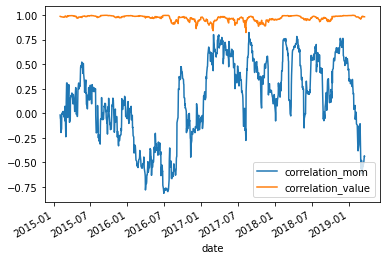

In [44]:
# Plot the correlations
df['correlation_mom'].plot()
df['correlation_value'].plot()
plt.legend()
plt.show()

In [45]:
factor_data = pd.read_csv('pf_factors.csv', parse_dates = ['date'], index_col = 'date').iloc[:, 1:]
factor_data.columns = ['momentum',  'value',  'portfolio']
factor_data.head()

,momentum,value,portfolio
date,,,
2016-01-04,-1.69,-1.53,-1.651745
2016-01-05,0.38,0.10,0.408161
2016-01-06,1.27,-1.22,0.325555
2016-01-07,0.21,-2.38,-0.698259
2016-01-08,-0.20,-0.91,-0.959352


In [46]:
# Calculate the pairwise correlation
factor_data.corr()

,momentum,value,portfolio
momentum,1.000000,-0.363237,0.001012
value,-0.363237,1.000000,0.767663
portfolio,0.001012,0.767663,1.000000


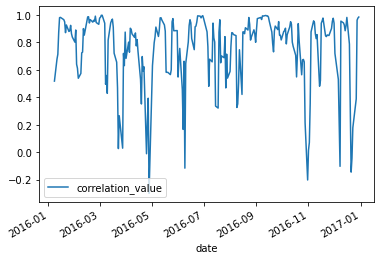

In [47]:
# Calculate rolling 5 day correlation 
factor_data['correlation_value']=factor_data['portfolio'].rolling(5).corr(factor_data['value'])

# Plot the rolling correlation
factor_data['correlation_value'].plot()
plt.legend()
plt.show()

In [48]:
factor_returns = pd.read_csv('factors_pf_returns.csv', parse_dates= ['date'], index_col = 'date')
factor_returns.head()

,Mkt-RF,SMB,HML,RF,pf_returns
date,,,,,
2016-01-04,-1.59,-0.83,0.53,0.0,-1.651745
2016-01-05,0.12,-0.22,0.01,0.0,0.408161
2016-01-06,-1.35,-0.12,0.00,0.0,0.325555
2016-01-07,-2.44,-0.29,0.08,0.0,-0.698259
2016-01-08,-1.11,-0.47,-0.03,0.0,-0.959352


In [49]:
# Print the correlation table 
print(factor_returns.corr())

              Mkt-RF       SMB       HML        RF  pf_returns
Mkt-RF      1.000000  0.331250  0.099800  0.087073    0.738586
SMB         0.331250  1.000000 -0.108081  0.076750    0.162303
HML         0.099800 -0.108081  1.000000 -0.049019   -0.237647
RF          0.087073  0.076750 -0.049019  1.000000    0.039383
pf_returns  0.738586  0.162303 -0.237647  0.039383    1.000000


In [50]:
import statsmodels.api as sm
# Define the model
model = sm.OLS(factor_returns['pf_returns'], factor_returns[['Mkt-RF','SMB', 'HML']]).fit()

In [51]:
# Create model predictions
predictions = model.predict(factor_returns[['Mkt-RF','SMB', 'HML']]) 

In [52]:
# Print out the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pf_returns   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.653
Method:                 Least Squares   F-statistic:                              158.8
Date:                Fri, 31 Dec 2021   Prob (F-statistic):                    1.55e-57
Time:                        09:05:37   Log-Likelihood:                         -185.67
No. Observations:                 252   AIC:                                      377.3
Df Residuals:                     249   BIC:                                      387.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.8234      0.040     20.627      0.000       0.745       0.902
SMB           -0.2272      0.064     -3.545      0.000      -0.353      -0.101
HML           -0.4826      0.056     -8.611      0.000      -0.593      -0.372
==============================================================================
Omnibus:                      143.224   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1746.552
Skew:                           1.972   Prob(JB):                         0.00
Kurtosis:                      15.279   Cond. No.                         1.89
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Obtain the beta coefficients
b1, b2, b3 = sm.OLS(factor_returns['pf_returns'], factor_returns[['Mkt-RF','SMB', 'HML']]).fit().params

# Print the betas
print ('Sensitivities of active returns to factors:\nMkt-Rf: %f\nSMB: %f\nHML: %f' %  (b1, b2, b3))

Sensitivities of active returns to factors:
Mkt-Rf: 0.823443
SMB: -0.227198
HML: -0.482598


In [ ]:
###############################################################################################

In [61]:
# Import the packages 
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

In [63]:
stock_prices = pd.read_csv('small_portfolio.csv', parse_dates = ['date'], index_col = 'date')

In [64]:
# Calculate expected returns mu 
mu = expected_returns.mean_historical_return(stock_prices)

# Calculate the covariance matrix S
Sigma = risk_models.sample_cov(stock_prices)

# Obtain the efficient frontier
ef = EfficientFrontier(mu, Sigma)
print (mu, Sigma)

GE     -0.175812
JPM     0.185643
MSFT    0.223083
PG     -0.045684
dtype: float64             GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810


In [69]:
# Get the returns from the stock price data
returns=stock_prices.pct_change()

# Calculate the annualized covariance matrix 
covMatrix = returns.cov()*252

# Calculate the covariance matrix Sigma from a`PyPortfolioOpt` function
Sigma = risk_models.sample_cov(stock_prices)

# Print both covariance matrices
print (covMatrix, Sigma)

            GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810             GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810


In [70]:
# Get the minimum risk portfolio for a target return 
weights = ef.efficient_return(0.2)
print (weights)

# Show portfolio performance 
ef.portfolio_performance(verbose=True)

OrderedDict([('GE', -5.091624204e-07), ('JPM', 0.4926526670102037), ('MSFT', 0.4900885822634468), ('PG', 0.0172592602492517)])
Expected annual return: 20.0%
Annual volatility: 19.2%
Sharpe Ratio: 0.94


(0.1999998860733183, 0.19152655992198875, 0.9398168387018209)

In [77]:
# Define the efficient frontier
ef = EfficientFrontier(mu, Sigma)

# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_maxsharpe = ef.max_sharpe()
cleaned_weights_maxsharpe = ef.clean_weights()
print (raw_weights_maxsharpe, cleaned_weights_maxsharpe)

OrderedDict([('GE', -1.2920984158e-06), ('JPM', 0.4251963824415912), ('MSFT', 0.5748053954668938), ('PG', -4.86089737e-07)]) OrderedDict([('GE', 0.0), ('JPM', 0.4252), ('MSFT', 0.57481), ('PG', 0.0)])


In [78]:
# Show portfolio performance 
print(cleaned_weights_maxsharpe)
ef.portfolio_performance(verbose=True)

OrderedDict([('GE', 0.0), ('JPM', 0.4252), ('MSFT', 0.57481), ('PG', 0.0)])
Expected annual return: 20.7%
Annual volatility: 19.6%
Sharpe Ratio: 0.96


(0.20716463941555868, 0.19595188300097044, 0.9551561156196278)

In [80]:
ef = EfficientFrontier(mu, Sigma)

# Calculate weights for the minimum volatility portfolio
raw_weights_minvol = ef.min_volatility()
cleaned_weights_minvol = ef.clean_weights()

# Show portfolio performance
print(cleaned_weights_minvol)
ef.portfolio_performance(verbose=True)

OrderedDict([('GE', 0.15732), ('JPM', 0.11714), ('MSFT', 0.04704), ('PG', 0.6785)])
Expected annual return: -2.6%
Annual volatility: 13.3%
Sharpe Ratio: -0.35


(-0.026415855502708224, 0.13292386608066414, -0.3491912842389117)

In [82]:
cleaned_weights_minvol = {'GE': 0.15825, 'JPM': 0.11004, 'MSFT': 0.05305, 'PG': 0.67865}
cleaned_weights_maxsharpe = {'GE': 0.0, 'JPM': 0.44137, 'MSFT': 0.55863, 'PG': 0.0}
perf_min_volatility = (-0.018136397146806496, 0.13293210141744938, -0.29689706294591417)
perf_max_sharpe = (0.2132161312005243, 0.19535212189989304, 0.9789284384681024)

# Print min vol and max sharpe results
print(cleaned_weights_minvol,cleaned_weights_maxsharpe,perf_min_volatility,perf_max_sharpe, sep="\n")

{'GE': 0.15825, 'JPM': 0.11004, 'MSFT': 0.05305, 'PG': 0.67865}
{'GE': 0.0, 'JPM': 0.44137, 'MSFT': 0.55863, 'PG': 0.0}
(-0.018136397146806496, 0.13293210141744938, -0.29689706294591417)
(0.2132161312005243, 0.19535212189989304, 0.9789284384681024)


In [86]:
# Define exponentially weightedSigma and mu using stock_prices
Sigma = risk_models.exp_cov(stock_prices, span=180, frequency=252)
mu = expected_returns.ema_historical_return(stock_prices, span=180, frequency=252)

# Calculate the efficient frontier
ef = EfficientFrontier(mu, Sigma)

# Calculate weights for the maximum sharpe ratio optimization
raw_weights_maxsharpe = ef.max_sharpe()

# Show portfolio performance 
ef.portfolio_performance(verbose=True)

Expected annual return: 27.1%
Annual volatility: 24.4%
Sharpe Ratio: 1.03


(0.2706006073408005, 0.24440606666066045, 1.0253452819922866)

In [91]:
# Calculate expected returns and sample covariance
mu_ema = expected_returns.ema_historical_return(stock_prices, span=504 ,frequency=252)
Sigma_ew = risk_models.exp_cov(stock_prices, span=504, frequency=252)
ef_2 = EfficientFrontier(mu_ema, Sigma_ew)

# Calculate weights for the maximum Sharpe ratio portfolio
weights = ef_2.max_sharpe()
cleaned_weights_maxsharpe_EW = ef_2.clean_weights()
perf_max_sharpe_EW = ef_2.portfolio_performance(verbose=True)

Expected annual return: 30.3%
Annual volatility: 18.5%
Sharpe Ratio: 1.53
